## Ising model

In this notebook, we calculate low lying energy eigenstates of an Ising chain using DMRG, and measure some observables in it.

In [1]:
using TensorNetworks, Plots

┌ Info: Precompiling TensorNetworks [bf05fd6d-b814-440f-8e78-cc5435f5625f]
└ @ Base loading.jl:1342


In [2]:
chain_length = 40
physical_dim = 2 
Dmax = 20
prec = 1e-14
truncation = TruncationArgs(Dmax, prec, false)

J = 1.0
h = .5
g = 0.001; #Small field to break degeneracy

Hmpo = IsingMPO(chain_length,J,h,g)
Hgates = isingHamGates(chain_length,J,h,g);

In [15]:
n_states= 5
initialmps = randomLCROpenMPS(chain_length, physical_dim, Dmax; truncation = truncation)
states, energies = eigenstates(Hmpo, initialmps, n_states, precision = prec, alpha=1.0);

E, var = -0.9827788189577713, 49.4022362954788
E, var = -41.70622441120674, 0.01738621357503689


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -41.70945029573114, 1.5916157281026244e-12
  1.651601 seconds (1.23 M allocations: 455.653 MiB, 3.00% gc time)
E, var = -0.9827788189577713, 49.4022362954788


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.6589455744898, 0.012183644603510402
E, var = -41.63276348660781, 7.503331289626658e-12
  1.600577 seconds (1.26 M allocations: 784.808 MiB, 2.59% gc time)
E, var = -0.9827788189577713, 49.4022362954788
E, var = -40.65045492842663, 0.06984747700880689
E, var = -40.672502684208, 5.0123384198741405e-5


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.67265343758098, 6.139089236967266e-11


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30
┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30
┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.67265343793197, 2.0463630789890885e-12
  3.432362 seconds (2.69 M allocations: 2.247 GiB, 3.52% gc time)
E, var = -0.9827788189577713, 49.4022362954788
E, var = -40.60233560699618, 0.024075827660226423
E, var = -40.64379000371399, 0.0010683917801088683
E, var = -40.644472053592686, 1.3757244232692756e-8
E, var = -40.64447208220098, -6.821210263296962e-13
  3.438452 seconds (2.72 M allocations: 2.797 GiB, 3.69% gc time)
E, var = -0.9827788189577713, 49.4022362954788
E, var = -40.54968425617091, 0.0603427076753178
E, var = -40.60973316652648, 0.005091297596663935


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30
┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.61332099943076, 1.5636996977264062e-6
E, var = -40.613324120313564, 1.0606981959426776e-9


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.61332412440747, -1.318767317570746e-11
  4.134939 seconds (3.42 M allocations: 4.165 GiB, 3.75% gc time)


In [16]:
magGate = Gate(sz)
mag = [real.(expectation_values(state, magGate)) for state in states];

domainwallGate = Gate(reshape(kron(sz,sz), (2,2,2,2)))
domainwall = [real.(1 .- expectation_values(state, domainwallGate))/2 for state in states];


es = [real.([expectation_value(state, Hgates[k],k) for k in 1:chain_length-1]) for state in states];

entropy = [TensorNetworks.entanglement_entropy(state) for state in states];


In [17]:
normalization = sqrt(sum(mag[1])^2 + sum(mag[2])^2)
zero_mag_state = (sum(mag[1])/normalization, states[1]) + (sum(mag[2])/normalization,states[2])
magsum = real.(expectation_values(zero_mag_state, magGate));
#fermiondensity2 = real.(expectation_values(zero_mag_state, MPOsite(sx), string=MPOsite(sz)));

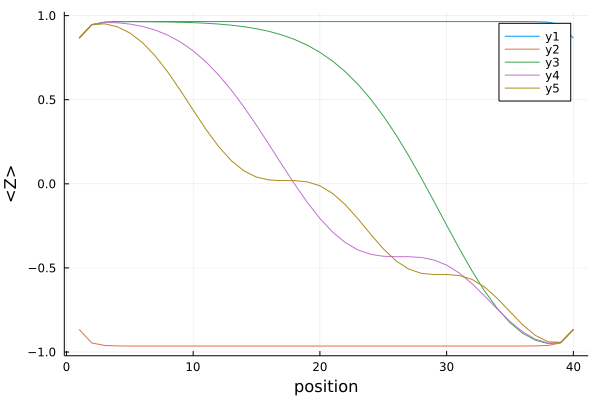

In [18]:
plot(mag, xlabel="position", ylabel = "<Z>")

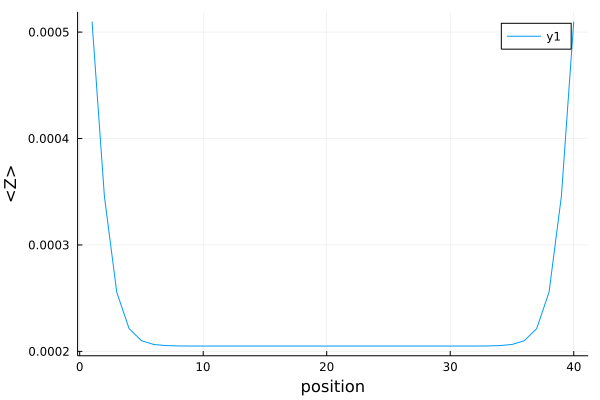

In [19]:
plot(magsum, xlabel="position", ylabel = "<Z>")

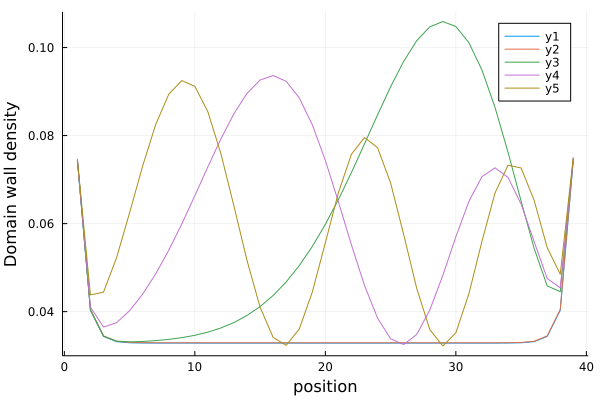

In [20]:
plot(domainwall, xlabel="position", ylabel = "Domain wall density")

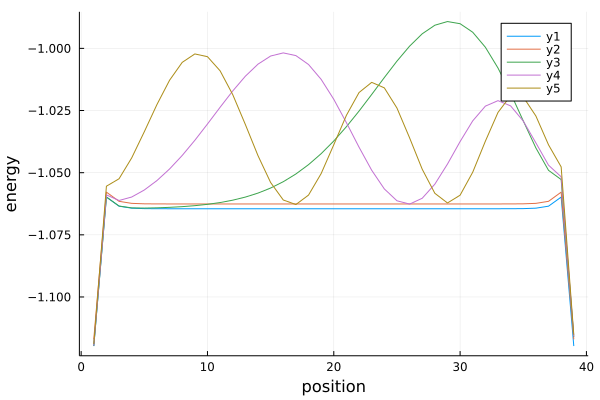

In [21]:
plot(es, xlabel="position", ylabel = "energy")

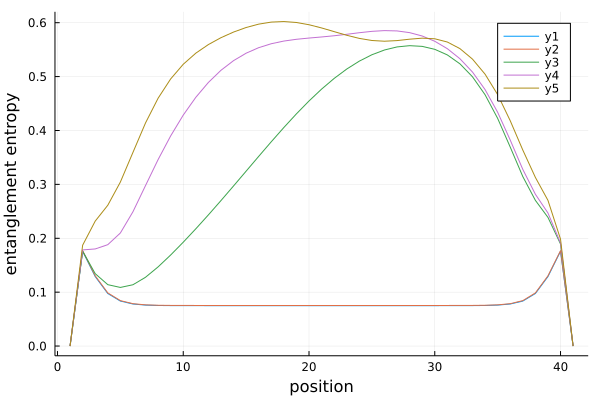

In [22]:
plot(real.(entropy), xlabel="position", ylabel = "entanglement entropy")